#데이터 전처리

##파일 불러오기

In [90]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# csv 데이터 가져오기, 한글 데이터의 경우 인코딩 변경 
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와 비즈니스 혁신/data/health_data.csv")

display(health.head()) # 처음 5행 확인
print(health.info())
display(health.isna().sum())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.100,1.200,1.500,...,1.100,21.000,27.000,21.000,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.000,0.800,0.800,...,0.500,18.000,15.000,15.000,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.000,0.600,0.700,...,0.700,27.000,25.000,7.000,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.800,1.000,1.000,...,1.200,65.000,97.000,72.000,No,No,1,0.000,0.000,12/29/2021
4,2020,5,41,F,12,155,50,75.200,1.500,1.200,...,0.700,18.000,17.000,14.000,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

##결측치 제거

각 열들의 결측치를 확인했는데, 결측치가 너무 많은 열들은 아예 제하고 시각화 하기 위해 결측치가 많은 열들을 제거하려고 한다.

In [93]:
#결측치가 너무 많은 열은 제거
health = health.drop(health.columns[[15, 16, 17, 18, 28, 29]], axis=1)
display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자
0,2020,1,36,M,9,165,60,72.100,1.200,1.500,...,15.000,1.000,1.100,21.000,27.000,21.000,No,No,0,12/29/2021
1,2020,2,27,F,13,150,65,81.000,0.800,0.800,...,12.700,1.000,0.500,18.000,15.000,15.000,No,No,0,12/29/2021
2,2020,3,11,F,12,155,55,70.000,0.600,0.700,...,12.800,1.000,0.700,27.000,25.000,7.000,No,No,0,12/29/2021
3,2020,4,31,M,13,160,70,90.800,1.000,1.000,...,16.400,1.000,1.200,65.000,97.000,72.000,No,No,1,12/29/2021
4,2020,5,41,F,12,155,50,75.200,1.500,1.200,...,12.400,1.000,0.700,18.000,17.000,14.000,No,No,0,12/29/2021


In [94]:
health = health.dropna(axis=0)
print("결측행 모두 제거: ", health.shape)

결측행 모두 제거:  (9858, 25)


##상관관계 확인

In [95]:
health.corr()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자일련번호,NaN,1.000,-0.009,0.001,-0.001,0.008,0.010,0.007,0.005,-0.010,...,0.005,0.000,-0.000,0.002,0.002,-0.005,0.005,0.010,-0.009,0.016
시도코드,NaN,-0.009,1.000,0.001,-0.008,0.019,0.028,0.012,0.021,-0.002,...,0.025,0.025,0.009,0.008,-0.014,0.006,-0.001,-0.001,0.014,-0.001
연령대코드(5세단위),NaN,0.001,0.001,1.000,-0.364,-0.238,0.091,-0.157,-0.163,0.217,...,0.213,-0.034,0.114,-0.172,0.032,0.049,0.051,-0.067,-0.052,-0.112
신장(5Cm단위),NaN,-0.001,-0.008,-0.364,1.000,0.670,0.331,0.111,0.124,-0.070,...,0.020,0.148,0.073,0.490,0.032,0.282,0.050,0.161,0.162,0.085
체중(5Kg 단위),NaN,0.008,0.019,-0.238,0.670,1.000,0.789,0.077,0.084,-0.044,...,0.213,0.277,0.157,0.459,0.045,0.249,0.104,0.274,0.181,0.074
허리둘레,NaN,0.010,0.028,0.091,0.331,0.789,1.000,0.011,0.011,0.035,...,0.282,0.260,0.205,0.348,0.047,0.206,0.128,0.257,0.173,0.040
시력(좌),NaN,0.007,0.012,-0.157,0.111,0.077,0.011,1.000,0.189,-0.026,...,-0.028,0.016,-0.004,0.063,-0.008,0.018,-0.011,0.016,0.018,0.010
시력(우),NaN,0.005,0.021,-0.163,0.124,0.084,0.011,0.189,1.000,-0.029,...,-0.042,0.003,-0.035,0.065,-0.001,0.074,-0.011,0.022,0.012,-0.005
청력(좌),NaN,-0.010,-0.002,0.217,-0.070,-0.044,0.035,-0.026,-0.029,1.000,...,0.038,-0.013,0.032,-0.031,0.039,0.035,0.014,-0.005,0.000,0.026


여러 변수들 중 비교적 상관관계 지수가 높은 변수 'ALT', '체중'을 가지고 시각화를 하고자 한다.

#데이터 시각화

In [96]:
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

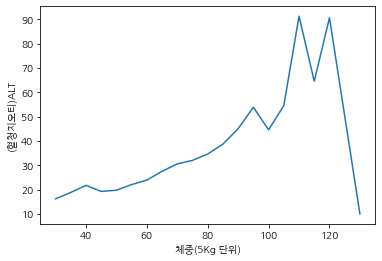

In [97]:
sns.lineplot(data = health, x = '체중(5Kg 단위)', y = '(혈청지오티)ALT', ci=None)

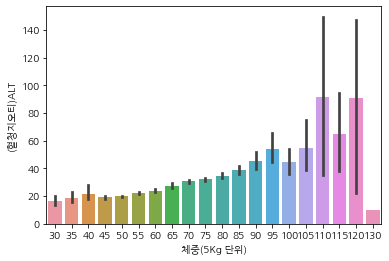

In [98]:
sns.barplot(data = health, x = '체중(5Kg 단위)', y = '(혈청지오티)ALT')

시각화를 해 본 결과, 체중이 높을수록 ALT 수치도 높아지는 것으로 확인된다. 하지만 키가 크면 체중이 많이 나가는 것은 당연한 것이기 때문에 이것이 비만률과 관련있는 것인지는 알 수 없다. 그래서 'BMI'라는 새로운 변수를 만들어 비만도와 ALT 수치 간의 관계를 알아보고자 한다.

#데이터 전처리

##BMI 변수 생성

In [99]:
health['BMI'] = 0
health['BMI'] = health['체중(5Kg 단위)'] / ((health['신장(5Cm단위)'] / 100) ** 2)
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자,BMI
0,2020,1,36,M,9,165,60,72.100,1.200,1.500,...,1.000,1.100,21.000,27.000,21.000,No,No,0,12/29/2021,22.039
1,2020,2,27,F,13,150,65,81.000,0.800,0.800,...,1.000,0.500,18.000,15.000,15.000,No,No,0,12/29/2021,28.889
2,2020,3,11,F,12,155,55,70.000,0.600,0.700,...,1.000,0.700,27.000,25.000,7.000,No,No,0,12/29/2021,22.893
3,2020,4,31,M,13,160,70,90.800,1.000,1.000,...,1.000,1.200,65.000,97.000,72.000,No,No,1,12/29/2021,27.344
4,2020,5,41,F,12,155,50,75.200,1.500,1.200,...,1.000,0.700,18.000,17.000,14.000,No,No,0,12/29/2021,20.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2020,9995,41,M,17,150,55,95.000,0.500,0.800,...,1.000,1.100,22.000,21.000,18.000,No,No,0,12/29/2021,24.444
9995,2020,9996,44,F,13,155,55,83.000,1.200,1.200,...,1.000,0.700,20.000,21.000,20.000,No,Yes,0,12/29/2021,22.893
9996,2020,9997,43,F,11,160,55,77.500,1.000,1.200,...,1.000,0.700,24.000,22.000,21.000,No,Yes,1,12/29/2021,21.484
9997,2020,9998,45,M,12,160,80,93.000,0.600,0.600,...,1.000,1.000,22.000,27.000,35.000,No,No,0,12/29/2021,31.250


##이상치 제거

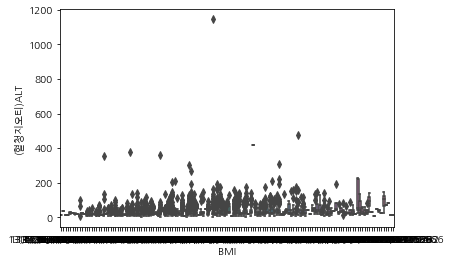

In [100]:
sns.boxplot(data = health, x = 'BMI', y = '(혈청지오티)ALT')

박스그래프를 그려 확인한 결과 ALT 수치에 이상치들이 많아서 하한치는 mean-2*sd로 상한치는 mean+2*sd로 잡아서 이상치를 제거하고자 한다.

In [101]:
descr = health.describe()
descr

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,BMI
count,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,...,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000,9858.000
mean,2020.000,4998.608,34.090,11.890,161.069,63.123,82.349,0.937,0.937,1.049,...,76.805,103.798,14.219,1.119,0.847,27.602,26.820,38.144,0.328,24.212
std,0.000,2886.448,12.394,2.138,9.183,12.208,9.552,0.659,0.618,0.225,...,9.929,24.677,1.553,0.490,0.294,17.918,23.785,58.318,0.470,3.485
min,2020.000,1.000,11.000,9.000,130.000,30.000,53.000,0.100,0.100,1.000,...,40.000,55.000,5.100,1.000,0.050,3.000,2.000,3.000,0.000,13.333
25%,2020.000,2499.250,27.000,10.000,155.000,55.000,76.000,0.700,0.700,1.000,...,70.000,91.000,13.200,1.000,0.700,20.000,16.000,16.000,0.000,22.039
50%,2020.000,4998.500,41.000,12.000,160.000,60.000,82.000,0.900,0.900,1.000,...,77.000,99.000,14.200,1.000,0.800,24.000,21.000,24.000,0.000,23.875
75%,2020.000,7499.750,44.000,13.000,170.000,70.000,88.800,1.200,1.200,1.000,...,83.000,109.000,15.300,1.000,1.000,30.000,31.000,39.000,1.000,26.122
max,2020.000,10000.000,49.000,18.000,195.000,130.000,134.000,9.900,9.900,3.000,...,130.000,473.000,20.000,6.000,9.200,692.000,1146.000,2322.000,1.000,43.704


In [102]:
descr = descr.transpose()
descr

,count,mean,std,min,25%,50%,75%,max
기준년도,9858.000,2020.000,0.000,2020.000,2020.000,2020.000,2020.000,2020.000
가입자일련번호,9858.000,4998.608,2886.448,1.000,2499.250,4998.500,7499.750,10000.000
시도코드,9858.000,34.090,12.394,11.000,27.000,41.000,44.000,49.000
연령대코드(5세단위),9858.000,11.890,2.138,9.000,10.000,12.000,13.000,18.000
신장(5Cm단위),9858.000,161.069,9.183,130.000,155.000,160.000,170.000,195.000
체중(5Kg 단위),9858.000,63.123,12.208,30.000,55.000,60.000,70.000,130.000
허리둘레,9858.000,82.349,9.552,53.000,76.000,82.000,88.800,134.000
시력(좌),9858.000,0.937,0.659,0.100,0.700,0.900,1.200,9.900
시력(우),9858.000,0.937,0.618,0.100,0.700,0.900,1.200,9.900
청력(좌),9858.000,1.049,0.225,1.000,1.000,1.000,1.000,3.000


In [103]:
descr['LL'] = 0
descr['LL'] = descr['mean'] - 2*descr['std']

descr['UL'] = 0
descr['UL'] = descr['mean'] + 2*descr['std']

descr

,count,mean,std,min,25%,50%,75%,max,LL,UL
기준년도,9858.000,2020.000,0.000,2020.000,2020.000,2020.000,2020.000,2020.000,2020.000,2020.000
가입자일련번호,9858.000,4998.608,2886.448,1.000,2499.250,4998.500,7499.750,10000.000,-774.288,10771.504
시도코드,9858.000,34.090,12.394,11.000,27.000,41.000,44.000,49.000,9.301,58.878
연령대코드(5세단위),9858.000,11.890,2.138,9.000,10.000,12.000,13.000,18.000,7.615,16.166
신장(5Cm단위),9858.000,161.069,9.183,130.000,155.000,160.000,170.000,195.000,142.704,179.435
체중(5Kg 단위),9858.000,63.123,12.208,30.000,55.000,60.000,70.000,130.000,38.706,87.539
허리둘레,9858.000,82.349,9.552,53.000,76.000,82.000,88.800,134.000,63.244,101.453
시력(좌),9858.000,0.937,0.659,0.100,0.700,0.900,1.200,9.900,-0.380,2.254
시력(우),9858.000,0.937,0.618,0.100,0.700,0.900,1.200,9.900,-0.299,2.173
청력(좌),9858.000,1.049,0.225,1.000,1.000,1.000,1.000,3.000,0.599,1.500


LL(하한치)는 마이너스값인데 min이 이미 양수값이기 때문에 제거할 필요가 없고 상한이상치만 제거하면 된다.

In [105]:
health = health[health['(혈청지오티)ALT'] <= 74.389]

In [106]:
health['(혈청지오티)ALT'].sort_values(ascending=False)

6784   74.000
7655   74.000
8904   74.000
131    74.000
9364   74.000
        ...  
369     4.000
9406    4.000
2444    3.000
6345    3.000
5905    2.000
Name: (혈청지오티)ALT, Length: 9575, dtype: float64

#데이터 시각화

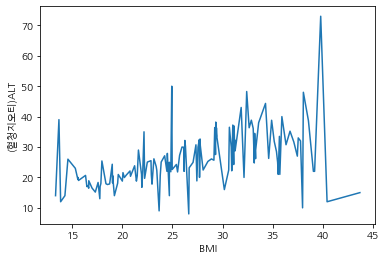

In [110]:
sns.lineplot(data = health, x = 'BMI', y = '(혈청지오티)ALT', ci=None)

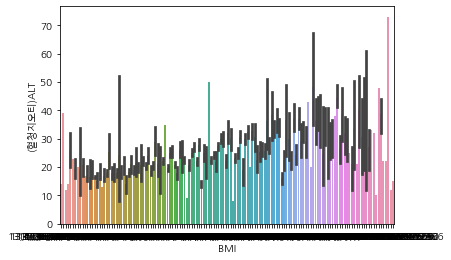

In [108]:
sns.barplot(data = health, x = 'BMI', y = '(혈청지오티)ALT')

사람마다 개인차가 있지만 전체적으로 BMI지수가 높은 쪽에 ALT도 높은 사람들이 많이 분포해 있는 것으로 보아 BMI와 ALT간에 양의 상관관계가 있을 것이라 판단된다. 즉, 비만도가 높을수록 간기능이 떨어질 가능성이 높다고 말할 수 있다.